In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import signal
from numpy.fft import fft, rfft, ifft
from audlib.sig.fbanks import Gammatone
from audlib.plot import magresp
plt.rc('text', usetex=True)

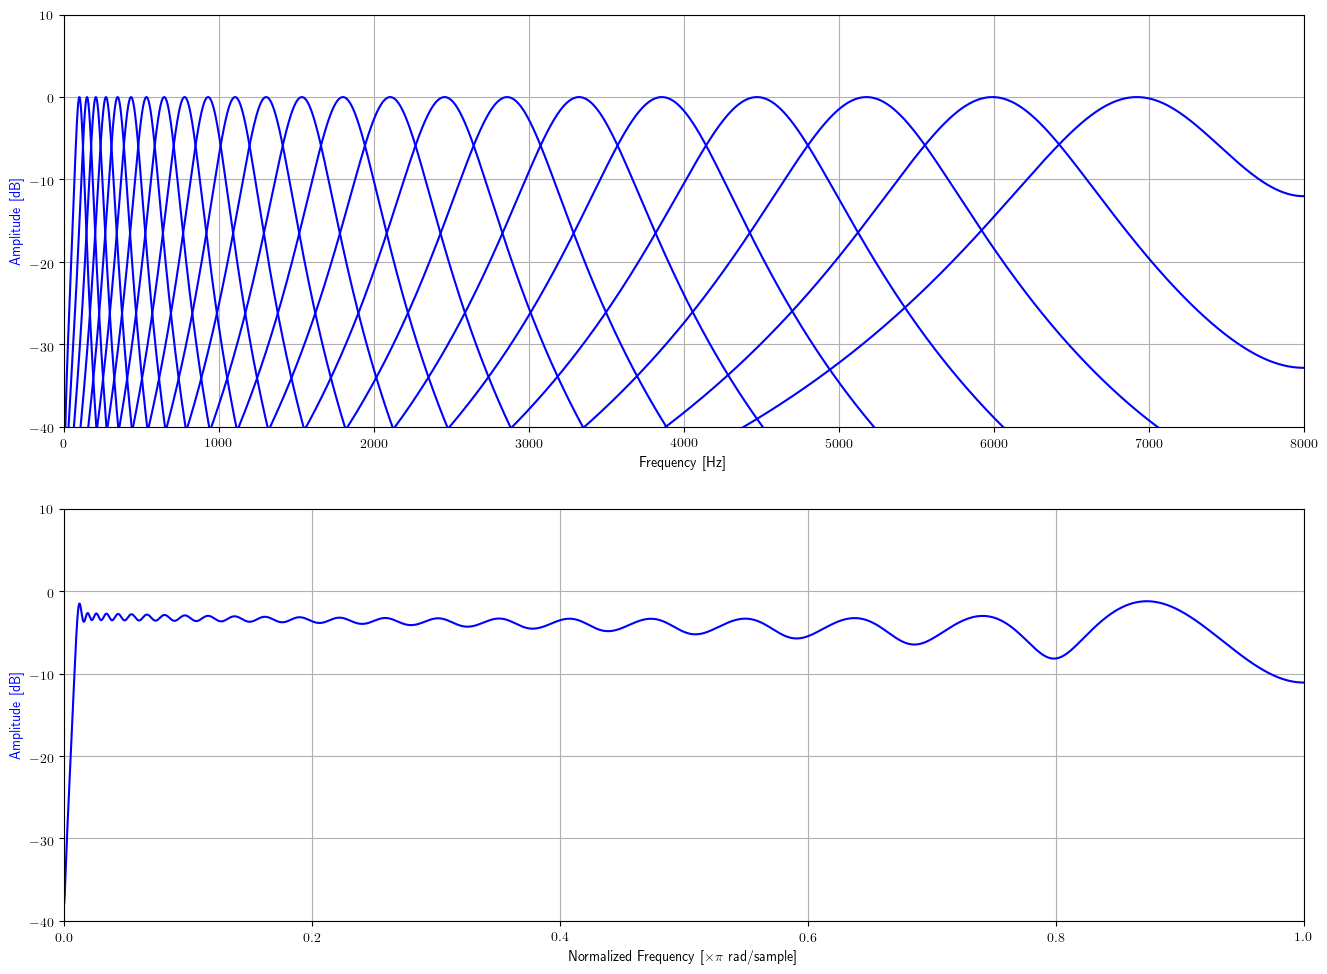

In [4]:
sr = 16000
nfft = 2**15
nyquist = nfft//2+1  # Boundary for Nyquist frequency
num_chans = 23
gtbank = Gammatone(sr, num_chans)

### Plot filter responses
fig = plt.figure(figsize=(16, 12), dpi= 100)
ax1 = fig.add_subplot(211)

total = np.zeros((nyquist), dtype=np.complex_)
for kk in range(len(gtbank)):
    ww, hh = gtbank.freqz(kk, nfft=nfft)
    total += hh[:nyquist]
    magresp(ww[:nyquist]*(sr/2), hh[:nyquist], ax1, units=('hz', 'db'))

# Plot total filter response
ax2 = fig.add_subplot(212)
magresp(ww[:nyquist], total, ax2, units=('rad', 'db'))